In [ ]:
# Importamos librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Datos de entrenamiento
dataset = pd.read_csv('/content/politicES.csv', index_col=0)
dataset = dataset[['tweets','ideologia_multiclase']]
print(dataset.head())





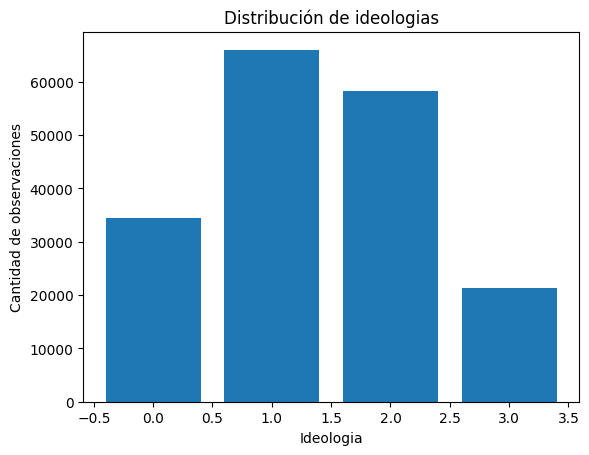

1    66000
2    58240
0    34400
3    21360
Name: ideologia_multiclase, dtype: int64


In [ ]:
# Contar la cantidad de observaciones para cada sentimiento
ideologia_count = dataset['ideologia_multiclase'].value_counts()

# Crear la gráfica de barras
plt.bar(ideologia_count.index, ideologia_count.values)

# Personalizar la gráfica
plt.xlabel('Ideologia')
plt.ylabel('Cantidad de observaciones')
plt.title('Distribución de ideologias')
plt.show()

print(ideologia_count)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['tweets'], dataset['ideologia_multiclase'], test_size=0.2, random_state=42)
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train.values.reshape(-1, 1), y_train)


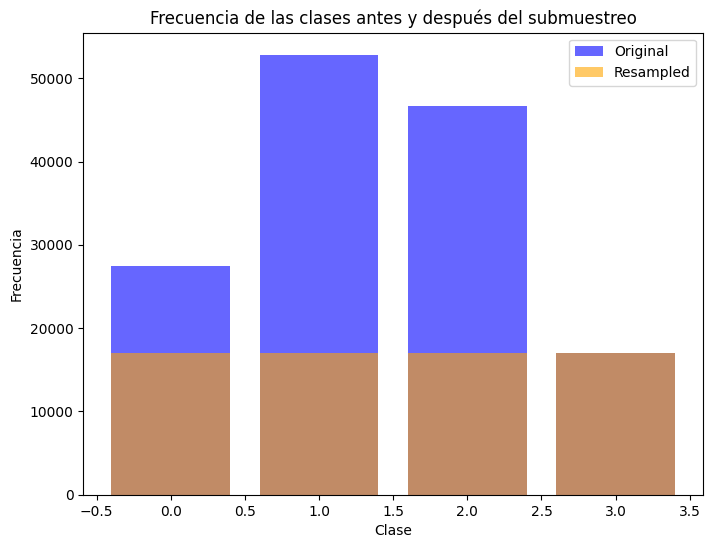

0    17070
1    17070
2    17070
3    17070
Name: ideologia_multiclase, dtype: int64


In [ ]:
# Contar las frecuencias de las clases antes y después del submuestreo
original_class_counts = y_train.value_counts()
resampled_class_counts = y_train_resampled.value_counts()

# Crear un gráfico de barras para comparar las frecuencias
plt.figure(figsize=(8, 6))
plt.bar(original_class_counts.index, original_class_counts.values, color='blue', alpha=0.6, label='Original')
plt.bar(resampled_class_counts.index, resampled_class_counts.values, color='orange', alpha=0.6, label='Resampled')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las clases antes y después del submuestreo')
plt.legend()
plt.show()
print(resampled_class_counts)

In [ ]:
# Crear un objeto TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_resampled.ravel())

X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# SVM con kernel RBF para clasificación multiclase (one-vs-one)
clf_ovo = SVC(kernel='rbf', decision_function_shape='ovr')
clf_ovo.fit(X_train_tfidf, y_train_resampled)
y_pred_ovo = clf_ovo.predict(X_test_tfidf)

print(accuracy_score(y_test, y_pred_ovo))
print(precision_score(y_test, y_pred_ovo, average='weighted'))
print(f1_score(y_test, y_pred_ovo, average='weighted'))
print(recall_score(y_test, y_pred_ovo, average='weighted'))

0.47530555555555554
0.5036118812847016
0.4806349266482334
0.47530555555555554


In [ ]:
# SVM con kernel RBF para clasificación multiclase (one-vs-one)
clf_ovo = SVC(kernel='linear', decision_function_shape='ovr', max_iter=1000)
clf_ovo.fit(X_train_tfidf, y_train_resampled)
y_pred_ovo = clf_ovo.predict(X_test_tfidf)

print(accuracy_score(y_test, y_pred_ovo))
print(precision_score(y_test, y_pred_ovo, average='weighted'))
print(f1_score(y_test, y_pred_ovo, average='weighted'))
print(recall_score(y_test, y_pred_ovo, average='weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.3022222222222222
0.34500507518951445
0.2996346496923187
0.3022222222222222


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear el clasificador SVM con kernel polinomial de grado 4
svm_poly = SVC(kernel='poly', degree=4)

# Entrenar el clasificador
svm_poly.fit(X_train_tfidf, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_poly.predict(X_test_tfidf)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4862222222222222


In [ ]:
from sklearn.linear_model import LogisticRegression
# Regresión logística para clasificación multiclase
clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train_resampled)
y_pred = clf.predict(X_test_tfidf)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.46455555555555555
0.4955297582297248
0.46995355270553346
0.46455555555555555


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Árbol de decisión para clasificación multiclase
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train_resampled)
y_pred = clf.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.3254166666666667
0.36072571806136594
0.33420868311766067
0.3254166666666667


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting para clasificación multiclase
clf = GradientBoostingClassifier()
clf.fit(X_train_tfidf, y_train_resampled)
y_pred = clf.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.3928888888888889
0.4307443980652331
0.39593778136667235
0.3928888888888889


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Crear el clasificador Naive Bayes
naive_bayes = MultinomialNB()

# Entrenar el clasificador
naive_bayes.fit(X_train_tfidf, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = naive_bayes.predict(X_test_tfidf)

# Calcular evaluación
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average='weighted'))
print(recall_score(y_test, y_pred, average='weighted'))

0.4666111111111111
0.5049955531176599
0.47169577265559604
0.4666111111111111
